#**Program to implement contrast stretching.**

In [ ]:
import cv2
import matplotlib.pyplot as plt
import math
import numpy as np
from google.colab.patches import cv2_imshow


In [ ]:
def c_hist(img):
  color = ('b','g','r')
  for i,col in enumerate(color):
      histr = cv2.calcHist(img,[i],None,[256],[0,256])
      plt.plot(histr,color = col)

def g_hist(img):
  hist = cv2.calcHist([img],[0],None,[256],[0,256])
  plt.plot(hist)

def h_plt(img,a_img):
  if len(img.shape)>2:
          plt.subplot(2,1,1)
          plt.title('Original Image histogram')
          c_hist(img)
          plt.subplot(2,1,2)
          c_hist(a_img)
          plt.title('Histogram of Contrasted stretched image')
          plt.tight_layout()
          plt.show()
  else:
    plt.subplot(2,1,1)
    plt.title('Original Image histogram')
    g_hist(img)
    plt.subplot(2,1,2)
    g_hist(a_img)
    plt.title('Histogram of Contrasted stretched image')
    plt.tight_layout()
    plt.show()

In [ ]:
def img_choice():
    print("\nThe image choice are :\n1.Color\n2.Gray scale")
    ic=int(input('Enter your choice : '))
    if ic not in [1,2]:
      print('Invalid Choice')
      img_choice()
    if ic==1:
      print('\nColor Image')
      c_img=cv2.imread('/content/drive/MyDrive/marvel/train/doctor strange/image.png')
      return c_img
    elif ic==2:
      print('\nGray Scale Image')
      g_img=cv2.imread('/content/drive/MyDrive/marvel/train/doctor strange/image.png',0)
      return g_img

In [ ]:
# Contrast stretching by changing the minimum and maximum intensity values

def minmax(image):
  maxiI = image.max() # Input image maximum intensity
  miniI = image.min() # Input image minimum intensity
  maxoI = 255 # Output image maximum intensity
  minoI = 0 # Output image minimum intensity
  stretched_image = image.copy()
  if len(image.shape)>2:
    height, width, _ = image.shape
    for i in range(0, height - 1):
        for j in range(0, width - 1):
            pixel = stretched_image[i, j]
            '''
            pout = (pin - miniI) * ((maxoI-minoI) / (maxiI-miniI)) + minoI

            '''
            # 1st index contains red pixel
            pixel[0] = (pixel[0] - miniI) * ((maxoI-minoI) / (maxiI-miniI)) + minoI
            # 2nd index contains green pixel
            pixel[1] = (pixel[1] - miniI) * ((maxoI-minoI) / (maxiI-miniI)) + minoI
            # 3rd index contains blue pixel
            pixel[2] = (pixel[2] - miniI) * ((maxoI-minoI) / (maxiI-miniI)) + minoI
            # Store new values in the pixel
            stretched_image[i, j] = pixel
    return stretched_image
  else:
    height, width = image.shape
    for i in range(0, height - 1):
        for j in range(0, width - 1):
            # Get the pixel value
            pixel = stretched_image[i, j]
            # scale each pixel by this formula
            '''
            pout = (pin - miniI) * ((maxoI-minoI) / (maxiI-miniI)) + minoI

            '''
            # 1st index contains red pixel
            pixel = (pixel - miniI) * ((maxoI-minoI) / (maxiI-miniI)) + minoI
            # Store new values in the pixel
            stretched_image[i, j] = pixel
    return stretched_image

In [ ]:
# Contrast stretching gamma transformation
def gamma(image):
  g=3.597
  gam=np.array(image.max()*(image/image.max())**g).astype('uint8')
  return g,gam

In [ ]:
# Normalise function
def nor(image):
  norm_img2 = cv2.normalize(image, None, alpha=0.05, beta=1,norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
  norm_img2 = np.clip(norm_img2, 0, 1)
  norm_img2 = (255*norm_img2).astype(np.uint8)
  return norm_img2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def main():
  print('\nContrast Stretching')
  while True:
    print('\nFunctions :\n1.Changing the minimum and maximum intensity values')
    print('2.Normalization')
    print('3.Gamma Transformation\n4.Exit')
    c=int(input('\nEnter your choice : '))
    if c==1:
      print('\nChanging the minimum and maximum intensity values')
      img=img_choice()
      a_img=minmax(img)
      h_plt(img,a_img)
      print('\nOriginal image\n')
      cv2_imshow(img)
      print("\nImage after contrast stretching\n")
      cv2_imshow(a_img)
    elif c==2:
      print('\nNormalization')
      img=img_choice()
      v_img=nor(img)
      print(v_img.shape)
      h_plt(img,v_img)
      print('\nOriginal image\n')
      cv2_imshow(img)
      print("\nImage after contrast stretching\n")
      cv2_imshow(v_img)
    elif c==3:
      print('\nGamma Transformation')
      img=img_choice()
      g,ga_img=gamma(img)
      h_plt(img,ga_img)
      print(ga_img.shape)
      print('\nOriginal image\n')
      cv2_imshow(img)
      print(f"\nImage after contrast stretching gamma {g}\n")
      cv2_imshow(ga_img)
    elif c==4:
      print("End")
      break
    else:
      print('Invalid Choice')
      continue


Contrast Stretching

Functions :
1.Changing the minimum and maximum intensity values
2.Normalization
3.Gamma Transformation
4.Exit

Enter your choice : 1

Changing the minimum and maximum intensity values

The image choice are :
1.Color
2.Gray scale
Enter your choice : 2

Gray Scale Image


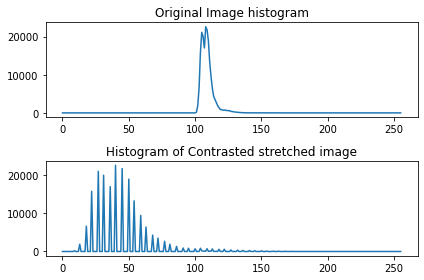


Original image



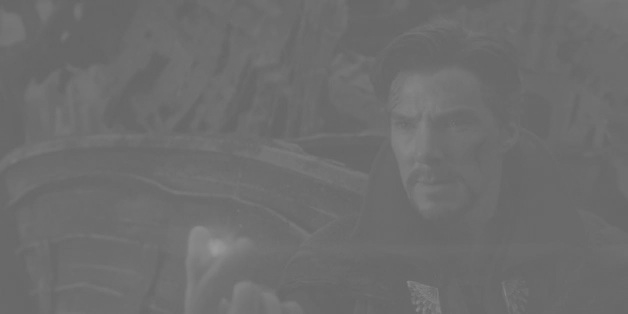


Image after contrast stretching



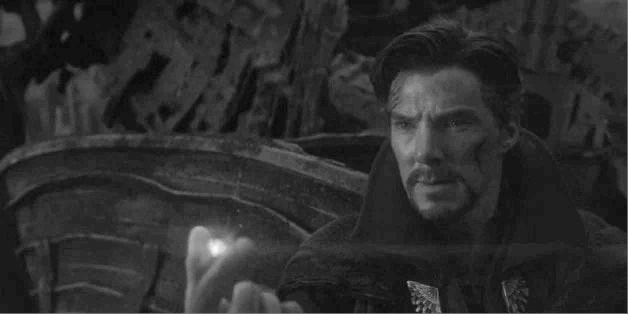


Functions :
1.Changing the minimum and maximum intensity values
2.Normalization
3.Gamma Transformation
4.Exit

Enter your choice : 2

Normalization

The image choice are :
1.Color
2.Gray scale
Enter your choice : 1

Color Image
(314, 628, 3)


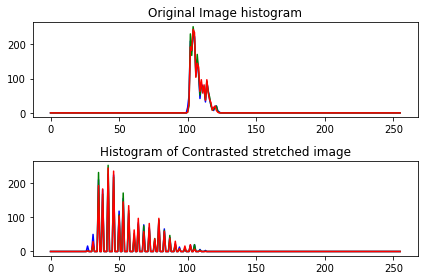


Original image



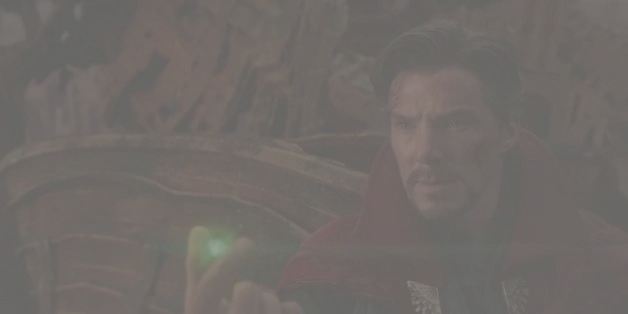


Image after contrast stretching



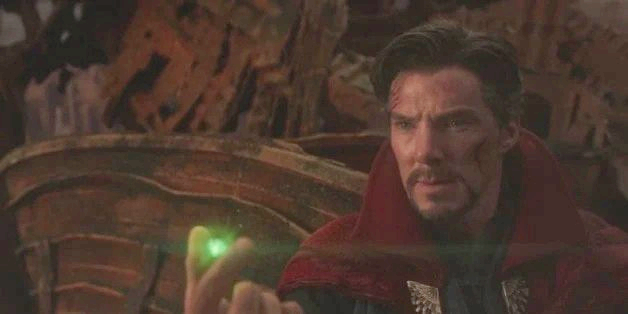


Functions :
1.Changing the minimum and maximum intensity values
2.Normalization
3.Gamma Transformation
4.Exit

Enter your choice : 3

Gamma Transformation

The image choice are :
1.Color
2.Gray scale
Enter your choice : 2

Gray Scale Image


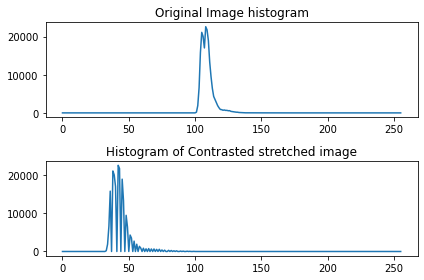

(314, 628)

Original image



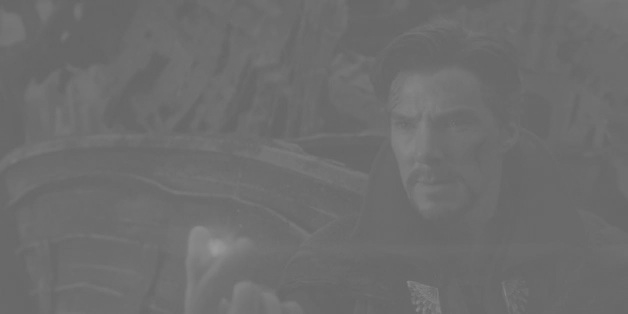


Image after contrast stretching gamma 3.597



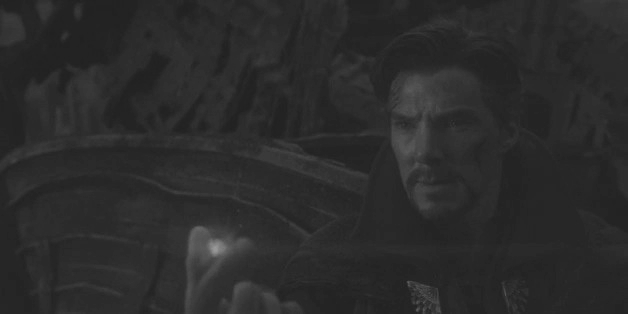


Functions :
1.Changing the minimum and maximum intensity values
2.Normalization
3.Gamma Transformation
4.Exit

Enter your choice : 3

Gamma Transformation

The image choice are :
1.Color
2.Gray scale
Enter your choice : 1

Color Image


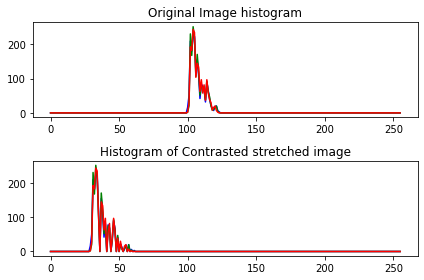

(314, 628, 3)

Original image



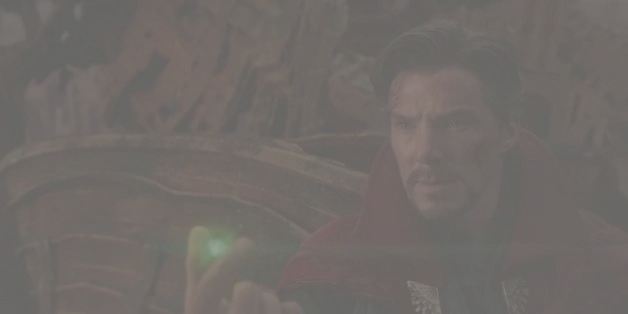


Image after contrast stretching gamma 3.597



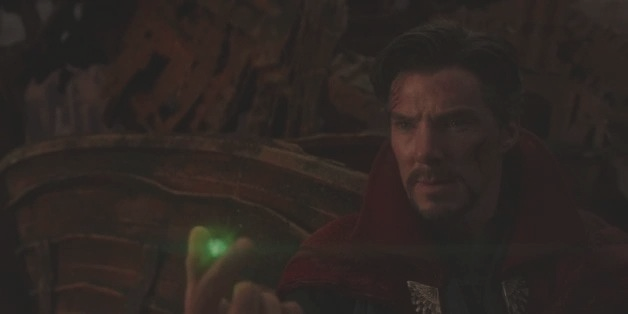


Functions :
1.Changing the minimum and maximum intensity values
2.Normalization
3.Gamma Transformation
4.Exit

Enter your choice : 4
End


In [ ]:
main()